<a href="https://colab.research.google.com/github/felipesayegg/Insurance/blob/main/KNN_insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 1. Entendimento do problema

Muitos fatores que afetam quanto você paga pelo seguro saúde não estão sob seu controle. No entanto, é bom entender o que são esses fatores. Aqui estão alguns fatores que afetam quanto custam os seguro saúde

* idade: idade do beneficiário principal
* sexo: sexo do contratante de seguros, feminino, masculino
* imc: Índice de massa corporal, fornecendo uma compreensão do corpo, pesos relativamente altos ou baixos em relação à altura, índice objetivo de peso corporal (kg/m ^ 2) usando a relação entre altura e peso, idealmente 18,5 a 24,9
* filhos: Número de filhos cobertos por seguro saúde / Número de dependentes
* fumante: Fumar
* região: a área residencial do beneficiário nos EUA, nordeste, sudeste, sudoeste, noroeste



# 2 - Coleta de dados

In [4]:
import pandas as pd # importando a biblioteca par o processamento de dados

In [5]:
df = pd.read_csv('/content/insurance (2).csv') # Lendo o conjunto de dados

In [6]:
df.head(10) # visualizando as 10 primeiras linhas do conjunto de dados

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [7]:
df.describe() # descrevendo o conjunto de dados

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# 3 - Pre - Processamento


In [8]:
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})  # sabendo que precisa trocar smoker por numero vizemos isso nesse codigo com a função map

In [9]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


In [10]:
df["charges"] = df["charges"]/100   # boa pratica deixar o numeros grande mais facil de ler então troquei a tabela charge dividino o numero real la por 100

In [11]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,168.849240
1,18,male,33.770,1,0,southeast,17.255523
2,28,male,33.000,3,0,southeast,44.494620
3,33,male,22.705,0,0,northwest,219.844706
4,32,male,28.880,0,0,northwest,38.668552


## 4 Modelo de ml - KNN

In [12]:

from sklearn.model_selection import train_test_split


In [13]:
x = df[["bmi", "smoker"]]
y = df["charges"]
x

,bmi,smoker
0,27.900,1
1,33.770,0
2,33.000,0
3,22.705,0
4,28.880,0
...,...,...
1333,30.970,0
1334,31.920,0
1335,36.850,0
1336,25.800,0


In [14]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=42) # Imagina que tenho um bano de dados e vou separar ele para treinar meu knn e deixar um guardado pra ver s eo treinamento foi bom
x_treino  # estou tirando a prova real pra ver se ele tirou mesmo o treino da lista

,bmi,smoker
332,31.160,0
355,27.600,0
138,31.900,0
381,30.685,1
292,45.540,1
...,...,...
1095,31.350,0
1130,23.870,0
1294,25.175,0
860,47.600,1


In [15]:
x_teste  # fiz a prova real do teste

,bmi,smoker
764,25.175,0
887,30.020,0
890,26.885,1
1293,25.745,0
259,31.920,1
...,...,...
701,44.745,0
672,29.700,0
1163,28.215,0
1103,36.080,0


In [16]:
from sklearn.neighbors import KNeighborsRegressor # importando a função do modelo knn

In [17]:
knn = KNeighborsRegressor(n_neighbors=5) # criando o modelo de arquitetura do knn

In [18]:
knn.fit(x_treino, y_treino) # treinando o modelo, eu separei uma parte para treino ele esta pegando para treinar ela e fazer as regressãoo acertiva

KNeighborsRegressor()

# 5 - Validação

In [19]:
from sklearn.metrics import mean_squared_error #  o comando from sklearn.metrics import mean_absolute_error é usado para importar a função mean_absolute_error da biblioteca scikit-learn,

In [20]:
from sklearn.metrics import mean_absolute_error

In [21]:
preditos = knn.predict(x_teste) # fazendo a predição, imagina que ele esta pegando o x da parte que separamos do teste e vai tentar calcular o valor que essas pessoas com um bmi x e se é fumanto ou não vai gastar de convenio

In [22]:
preditos

array([ 50.9487947 , 105.97397002, 227.3456629 ,  78.8657287 ,
       387.4980591 ,  68.61480274,  42.1060069 ,  78.7442308 ,
        41.4049028 ,  91.781572  , 218.22638864,  68.72372428,
        96.29833982, 423.4749951 , 397.0821718 , 454.30444938,
        51.58222694, 447.06534688,  89.9871794 , 227.3456629 ,
        63.2814634 ,  97.84667924,  60.8757259 , 102.67217314,
       105.3271355 , 104.85290894,  56.3275858 ,  60.8757259 ,
        75.2967276 , 126.0152617 ,  46.8174712 , 154.61260236,
        43.4762867 ,  48.1752858 ,  97.47138512, 102.67217314,
       100.3740992 ,  74.2112367 , 224.25513424, 414.0811576 ,
        82.3803643 , 125.56722024,  74.6762228 , 112.88310646,
        99.43938844,  86.1952729 , 112.39349256,  98.3032378 ,
       426.1732264 ,  82.713145  ,  78.0978563 ,  43.7842128 ,
        87.6224938 ,  54.3844498 ,  36.6649608 ,  74.5154612 ,
       112.88310646, 442.15852314,  80.1763216 , 124.79372012,
       104.47672804,  68.61480274, 110.46171356, 114.11

In [23]:
eqm = mean_squared_error(y_teste, preditos) # lembra do y teste que tem o valores do seugro anul que a gente guarudou vamos

In [24]:
eqm

4334.177727404989

In [25]:
mae = mean_absolute_error(y_teste, preditos)
print(mae)

47.71185037599503


# 7 - Testando para outros valor de  k-vizinhos

In [26]:
knn10 = KNeighborsRegressor(n_neighbors = 10) # Defininindo o modelo knn mas no caso definindo 10 vizinho para ver se vai melhorar

In [27]:
knn10.fit(x_treino, y_treino) # Treinando o modelo com a media de 10

KNeighborsRegressor(n_neighbors=10)

In [28]:
y_hat10 = knn10.predict(x_teste)

In [29]:
eqm10 = mean_squared_error(y_teste, y_hat10)
print(eqm10) #

4767.085610417946


In [30]:
knn15 = KNeighborsRegressor(n_neighbors = 15)
knn15.fit(x_treino, y_treino)

KNeighborsRegressor(n_neighbors=15)

In [31]:
y_hat15 = knn15.predict(x_teste)

In [32]:
eqm15 = mean_squared_error(y_teste, y_hat15)
print(eqm15)

5465.5029910323


In [33]:
## Encontrando o melhor k para o knn
# Testar diferentes valores de k
k_values = range(1, 31)  # Testar k de 1 até 30
eqm_score = []
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(x_treino, y_treino)
    y_pred = knn.predict(x_teste)
    eqm = mean_squared_error(y_teste, y_pred)
    eqm_score.append(eqm)

In [34]:
eqm_score

[6830.131737086593,
 5553.46846871159,
 4941.378955951323,
 4629.963337728957,
 4334.177727404989,
 4453.183652532883,
 4412.4469281767415,
 4585.228494435725,
 4607.905628166595,
 4767.085610417946,
 4846.79331012831,
 4960.912572334515,
 5086.034974884224,
 5265.453292133093,
 5465.5029910323,
 5479.428366066445,
 5659.569015548862,
 5769.961266685668,
 5824.6575221097255,
 5958.804448463982,
 6078.9742659522035,
 6203.502533375253,
 6243.138906748017,
 6305.352975727131,
 6388.4548129676095,
 6529.463822390202,
 6635.296056158501,
 6729.297993922832,
 6824.595880076544,
 6964.128320608421]

In [35]:
import matplotlib.pyplot as plt #biblioteca para criar gráficos

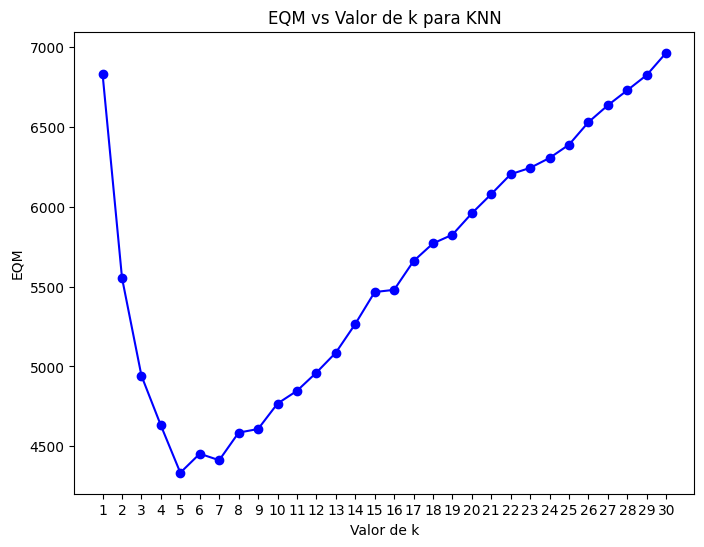

In [36]:
# Plotar o gráfico da acurácia em função de k
plt.figure(figsize = (8, 6)) #definindo o tamanho da figura
plt.plot(k_values, eqm_score, marker='o', linestyle='-', color='b') #definindo o eixo x e eixo e estilo de linha
plt.xlabel('Valor de k') #titulo do eixo x
plt.ylabel('EQM') # titulo do eixo y
plt.title('EQM vs Valor de k para KNN') # titulo do gráficos
plt.xticks(k_values)
plt.grid(False) # grade do fundo
plt.show()

In [37]:
k_values = range(1, 100)  # Testar k de 1 até 30
mae_escore = []
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(x_treino, y_treino)
    y_pred = knn.predict(x_teste)
    mae = mean_absolute_error(y_teste, y_pred)
    mae_escore.append(mae)

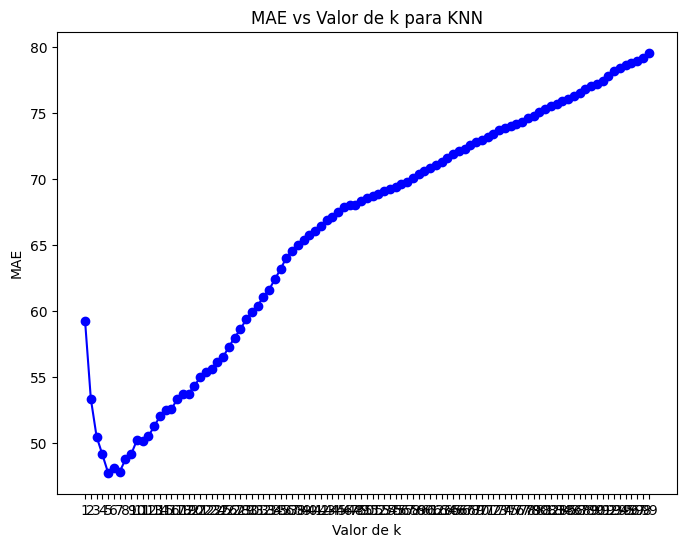

In [38]:
plt.figure(figsize = (8, 6)) #definindo o tamanho da figura
plt.plot(k_values, mae_escore, marker='o', linestyle='-', color='b') #definindo o eixo x e eixo e estilo de linha
plt.xlabel('Valor de k') #titulo do eixo x
plt.ylabel('MAE') # titulo do eixo y
plt.title('MAE vs Valor de k para KNN') # titulo do gráficos
plt.xticks(k_values)
plt.grid(False) # grade do fundo
plt.show()

# O k=5 é o melhor k para o KNN, pois retornou o menores EQM e MAE entre todos os testados.